In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving CardBase.csv to CardBase.csv


In [ ]:
card_base=pd.read_csv('CardBase.csv')
card_base.info()
card_base.describe()
card_base.rename(columns={'Card_Number':'card_id','Card_Family':'card_family','Credit_Limit':'credit_limit','Cust_ID':'customer_id'},inplace=True)
card_base['card_family']=card_base['card_family'].str.strip().str.lower()
card_base['customer_id'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Card_Number   500 non-null    object
 1   Card_Family   500 non-null    object
 2   Credit_Limit  500 non-null    int64 
 3   Cust_ID       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


482

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CustomerBase.csv to CustomerBase.csv


In [ ]:
customer_base=pd.read_csv('CustomerBase.csv',sep=',')
customer_base.columns=customer_base.columns.str.strip().str.lower()
customer_base.rename(columns={'cust_id':'customer_id'},inplace=True)
customer_base['customer_segment']=customer_base['customer_segment'].str.strip().str.lower()
customer_base['customer_id'].nunique()



5674

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TransactionBase.csv to TransactionBase.csv


In [ ]:
transct_base=pd.read_csv('TransactionBase.csv',sep=',')
transct_base.columns=transct_base.columns.str.strip().str.lower()
transct_base.rename(columns={'credit_card_id':'card_id','Transaction_date':'date','transaction_value':'value'},inplace=True)
transct_base[transct_base['value'].isna()]
transct_base['value']=transct_base.groupby('card_id')['value'].transform(lambda x : x.fillna(x.mean))
transct_base[transct_base['value'].isna()]
transct_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transaction_id       10000 non-null  object
 1   transaction_date     10000 non-null  object
 2   card_id              10000 non-null  object
 3   value                10000 non-null  int64 
 4   transaction_segment  10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving FraudBase.csv to FraudBase.csv


In [ ]:
fraud=pd.read_csv('FraudBase.csv')
fraud.columns=fraud.columns.str.strip().str.lower()

In [88]:
merged_ds=pd.merge(
    pd.merge(card_base,customer_base,on='customer_id',how='inner'),
    transct_base,
    on='card_id',
    how='outer')
#format numeric columns
merged_ds['value']=pd.to_numeric(merged_ds['value'],errors='coerce')

#fill null values
merged_ds.groupby('card_id')['value'].transform(lambda x : x.fillna(x.mean()))

#extract year and month to analyze data overtime
merged_ds['transaction_date']=pd.to_datetime(merged_ds['transaction_date'],format='%d-%b-%y')
merged_ds['year']=merged_ds['transaction_date'].dt.year
merged_ds['year'].unique()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
merged_ds['month'] = pd.Categorical(merged_ds['transaction_date'].dt.month_name(), categories=month_order, ordered=True)
merged_ds['month'].unique()

#analyze the distribuition of spending accross of customer segment
merged_ds.groupby('customer_segment')['value'].sum().reset_index().sort_values('value',ascending=False)

#verify if the credit limit value impacts the total spent by customer segment
merged_ds.groupby('customer_segment').agg(Avg_credit_limit=('credit_limit','mean'),Total_Spent=('value','sum'),Total_transc=('transaction_id','count'))
merged_ds.loc[merged_ds.groupby('customer_segment')['credit_limit'].idxmax()][['customer_segment','credit_limit','card_family']].reset_index(drop=True)
merged_ds.info()

#analyze the behaviour of total spending based on the age category and card_family
merged_ds['age_category']=merged_ds['age'].apply(lambda x : '20-30' if x <=30 else '31-40' if x>30 and x<41 else '41-50' )
display(merged_ds.groupby('age_category').size())
merged_ds['card_cust_seg']= merged_ds.apply(lambda x : x['card_family']==x['customer_segment'],axis=1)
merged_ds[merged_ds['card_cust_seg']==False]
merged_ds['card_family'].value_counts()
merged_ds['customer_segment'].value_counts()
merged_ds[merged_ds['card_cust_seg']==False]
groupped=merged_ds.groupby(['age_category','card_family'])['value'].sum().astype(float).reset_index()
pd.options.display.float_format = '{:,.2f}'.format
display(groupped.loc[groupped.groupby('age_category')['value'].idxmax()])
display(merged_ds.groupby('age_category')['value'].sum().astype(float).reset_index().sort_values('value',ascending=False))
display(merged_ds.groupby(['age_category','card_family']).agg(avg_credit_lim=('credit_limit','mean'),total_spent=('value','sum')).astype(float).reset_index())
display(merged_ds.groupby('card_family').agg(avg_credit_lim=('credit_limit','mean'),total_spent=('value','sum')).astype(float).reset_index())
display(merged_ds.groupby(['card_family','customer_segment']).size().reset_index(name='count'))
display(merged_ds['customer_segment'].value_counts())

#analyze the characteristics of each customer segment like: most frecuent category, most used card family. This in order to determine if there is a relationship between total spent and customer segment
pd.options.display.float_format = '{:,.2f}'.format
display(merged_ds.groupby('customer_segment')['value'].sum().astype(float).reset_index().sort_values('value',ascending=False))
groupped=merged_ds.groupby(['customer_segment','age_category','card_family'])['value'].sum().astype(float).reset_index()
groupped.loc[groupped.groupby('customer_segment')['value'].idxmax()][['customer_segment','age_category','card_family','value']]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   card_id                 10000 non-null  object        
 1   card_family             10000 non-null  object        
 2   credit_limit            10000 non-null  int64         
 3   customer_id             10000 non-null  object        
 4   age                     10000 non-null  int64         
 5   customer_segment        10000 non-null  object        
 6   customer_vintage_group  10000 non-null  object        
 7   transaction_id          10000 non-null  object        
 8   transaction_date        10000 non-null  datetime64[ns]
 9   value                   10000 non-null  int64         
 10  transaction_segment     10000 non-null  object        
 11  year                    10000 non-null  int32         
 12  month                   10000 non-null  categor

,0
age_category,
20-30,3373
31-40,3071
41-50,3556


,age_category,card_family,value
2,20-30,premium,"35,528,545.00"
5,31-40,premium,"31,786,094.00"
6,41-50,gold,"36,138,092.00"


,age_category,value
2,41-50,"88,143,605.00"
0,20-30,"83,894,049.00"
1,31-40,"75,549,759.00"


,age_category,card_family,avg_credit_lim,total_spent
0,20-30,gold,"30,572.85","27,553,936.00"
1,20-30,platinum,"135,460.26","20,811,568.00"
2,20-30,premium,"494,595.09","35,528,545.00"
3,31-40,gold,"28,365.40","27,233,592.00"
4,31-40,platinum,"122,043.35","16,530,073.00"
5,31-40,premium,"512,908.32","31,786,094.00"
6,41-50,gold,"24,815.17","36,138,092.00"
7,41-50,platinum,"136,157.53","18,066,516.00"
8,41-50,premium,"537,335.03","33,938,997.00"


,card_family,avg_credit_lim,total_spent
0,gold,"27,620.46","90,925,620.00"
1,platinum,"131,585.87","55,408,157.00"
2,premium,"514,741.64","101,253,636.00"


,card_family,customer_segment,count
0,gold,diamond,1716
1,gold,gold,1166
2,gold,platinum,754
3,platinum,diamond,1066
4,platinum,gold,605
5,platinum,platinum,594
6,premium,diamond,1678
7,premium,gold,1481
8,premium,platinum,940


,count
customer_segment,
diamond,4460
gold,3252
platinum,2288


,customer_segment,value
0,diamond,"110,625,357.00"
1,gold,"80,688,450.00"
2,platinum,"56,273,606.00"


,customer_segment,age_category,card_family,value
0,diamond,20-30,gold,"15,319,285.00"
11,gold,20-30,premium,"14,294,907.00"
24,platinum,41-50,gold,"10,175,648.00"


Text(0.5, 1.0, 'Credit limit vs Card Family')

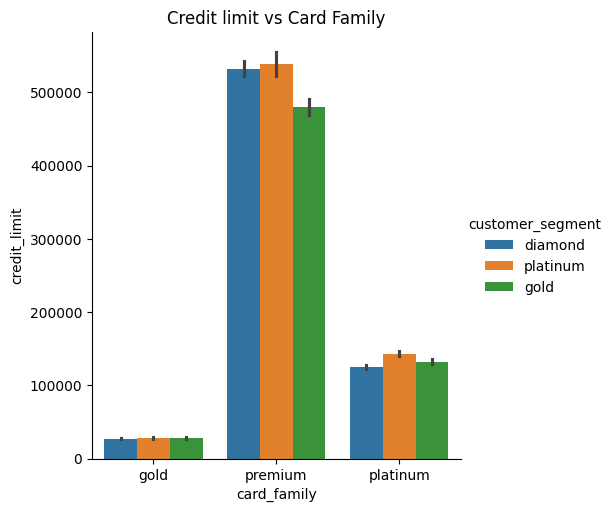

In [89]:
sns.catplot(x='card_family',y='credit_limit',data=merged_ds,kind='bar',hue='customer_segment',hue_order=['diamond','platinum','gold'])
plt.title('Credit limit vs Card Family')

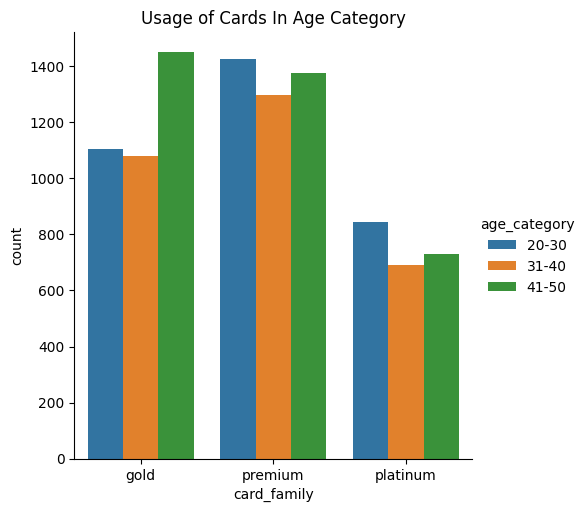

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='card_family',data=merged_ds,kind='count',hue='age_category',hue_order=['20-30','31-40','41-50'])
plt.title('Usage of Cards In Age Category')
plt.show()

/tmp/ipython-input-68-1656535507.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sum=merged_ds.groupby(['month','card_family'])['value'].sum().reset_index()


Text(0.5, 1.0, 'Monthly Total Value by Card Family')

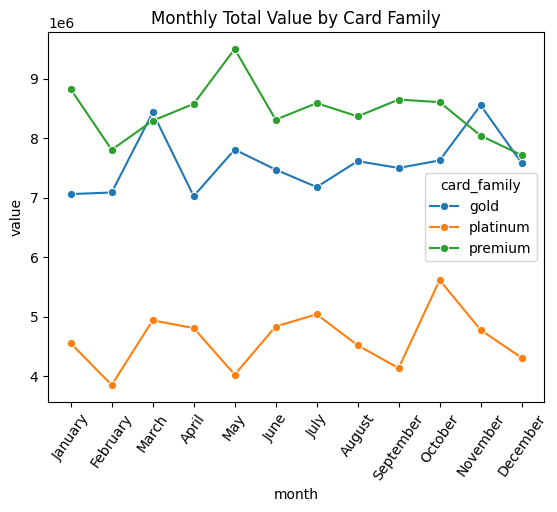

In [68]:
monthly_sum=merged_ds.groupby(['month','card_family'])['value'].sum().reset_index()
sns.lineplot(data=monthly_sum,x='month',y='value',hue='card_family',marker='o')
plt.xticks(rotation=55)
plt.title('Monthly Total Value by Card Family')